<a href="https://colab.research.google.com/github/unknown-jun/Face_Recognition/blob/main/face_recognition_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강의의 최종 목표!



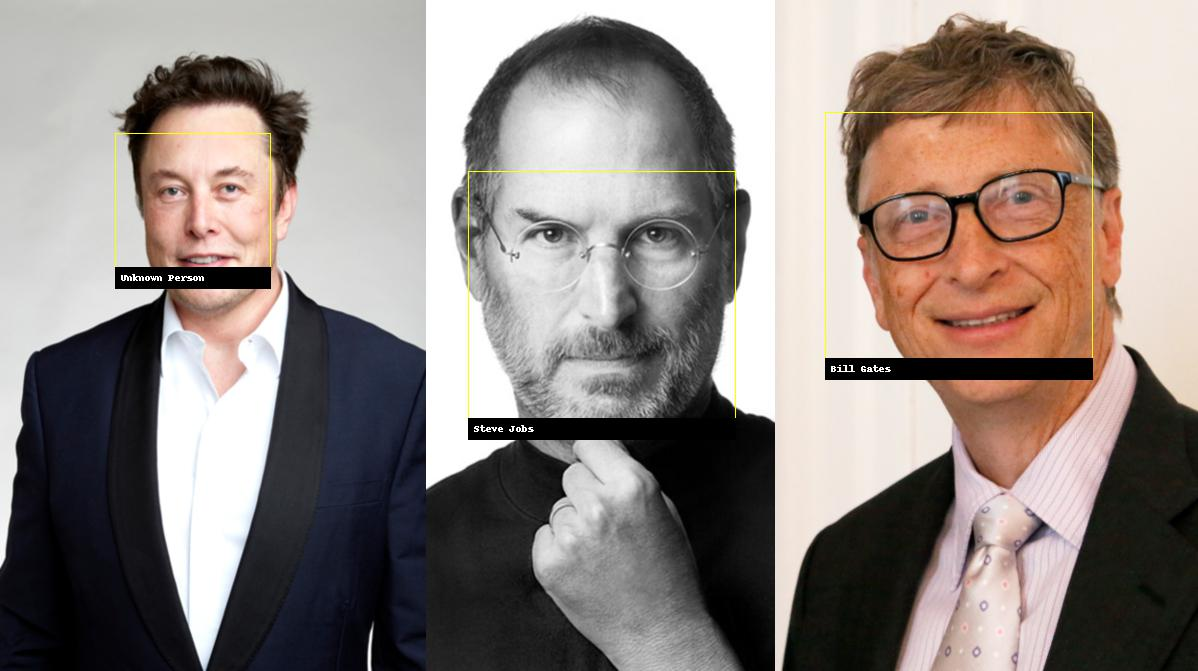

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 98kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=3f12b69fc72968434a9b9c30db2687897fc33db1d22fa2f897c2718bc3df5be4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
!curl -o jobs.jpg https://media.snl.no/media/53665/standard_compressed_2048px-Steve_Jobs_Headshot_2010-CROP.jpg      # 스티븐 잡스
!curl -o bill_gate.jpg https://cdn.pixabay.com/photo/2020/05/05/06/17/bill-gates-5131583_1280.png # 빌 게이츠 사진 2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27426  100 27426    0     0   892k      0 --:--:-- --:--:-- --:--:--  892k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0  1190k      0 --:--:-- --:--:-- --:--:-- 1189k


# 라이브러리 불러오기



In [13]:
import face_recognition  # 얼굴인식을 위한 기능
import cv2  # 사진의 조작을 위한 기능
from google.colab.patches import cv2_imshow # 코랩에서 imshow를 하기 위한 기능
from PIL import Image  # 이미지를 크롭해서 가져오기 위한 라이브러리
from IPython.display import Image as Pymage # 코랩에서 imshow를 하기 위한 기능 Pymage를 한 이유는 PIL과 구분 짓기 위함

# 파일 읽어들이기

face_recognition.load_image_file( ) 는 사진을 행렬의 형태로 출력해주게 하는 함수  


In [4]:
image_of_obama1 = face_recognition.load_image_file('jobs.jpg') # 사진을 로드한다
image_of_obama1  # shape는 (851, 1280, 3)

array([[[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       [[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       [[ 7,  4, 25],
        [ 7,  4, 25],
        [ 7,  4, 25],
        ...,
        [ 7,  5, 19],
        [ 7,  5, 19],
        [ 7,  5, 19]],

       ...,

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [13, 12, 52],
        [13, 12, 52],
        [13, 12, 52]]], dtype=uint8)

# 얼굴의 좌표점 찾기

In [5]:
import face_recognition

Musk_jobs_gates = face_recognition.load_image_file('Musk_jobs_gates.jpg') # 사진을 로드한다
locations = face_recognition.face_locations(Musk_jobs_gates)  # 사진에서 얼굴을 찾아 array의 형태로 반환
print(locations)
print(f'이 사진에 {len(locations)} 명이 있습니다')

[(171, 735, 439, 468), (133, 270, 288, 115), (112, 1092, 379, 825)]
이 사진에 3 명이 있습니다


#얼굴 사진을 크롭해서 가져오고 파일로 저장하기

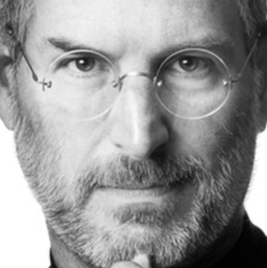

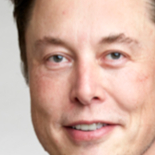

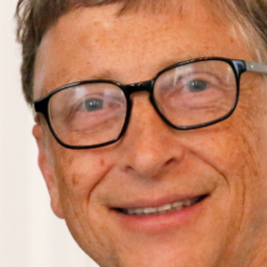

In [6]:
from PIL import Image  

locations = face_recognition.face_locations(Musk_jobs_gates)  # 사진에서 얼굴을 찾아 array의 형태로 반환

for face_location in locations:  # loop문을 돌아서 사진상에 모든 얼굴을 불러들임
    top, right, bottom, left = face_location  # 사진 안에서 모든 얼굴에 대한 위치 좌표값들을 각각의 변수에 담음

    face_image = Musk_jobs_gates[top:bottom, left:right] 
    pil_image = Image.fromarray(face_image)  # face_image 변수에 담긴 위치 정보를 토대로 사진을 사각형으로 잘라냄  
    display(pil_image)  # 결과창에 띄움
    pil_image.save(f'{top}.jpg')  # 얼굴 사진들을 저장함

# 사진을 다른 사진과 비교하여 같은 사람인지를 맞추기

In [7]:
jobs = face_recognition.load_image_file('jobs.jpg')
jobs_encoding = face_recognition.face_encodings(jobs)[0]        # 얼굴에 대한 정보를 128차원의 array형태로 알려줌

bill_gate = face_recognition.load_image_file('bill_gate.jpg')
bill_gate_encoding = face_recognition.face_encodings(bill_gate)[0]      # 비교대상군 사진의 128차원 array

Musk_jobs_gates = face_recognition.load_image_file('Musk_jobs_gates.jpg')
Musk_jobs_gates_encoding = face_recognition.face_encodings(Musk_jobs_gates)[0]  # 비교대상군 사진의 128차원 array

# 얼굴을 비교하기
results = face_recognition.compare_faces([jobs_encoding], bill_gate_encoding)

# 얼굴의 좌표값에 대한 거리 차이 구하기
print(face_recognition.face_distance([jobs_encoding], bill_gate_encoding))

if results[0]:
    print('이 사람은 스티브 잡스 입니다.')
else:
    print('이 사람은 스티브 잡스가 아닙니다.')

# 다른 사람의 얼굴 비교하기
results2 = face_recognition.compare_faces([jobs_encoding], Musk_jobs_gates_encoding)

# 얼굴의 좌표값에 대한 거리 차이 구하기
print(face_recognition.face_distance([jobs_encoding], Musk_jobs_gates_encoding))

if results2[0]:
    print('이 사진 속에 스티브 잡스가 있습니다.')
else:
    print('이 사진 속에 스티브 잡스가 없습니다.')

[0.71517399]
이 사람은 스티브 잡스가 아닙니다.
[0.41800562]
이 사진 속에 스티브 잡스가 있습니다.


# 얼굴 속에 눈/코/입의 위치를 찾아내기

1 명의 얼굴을 이 사진에서 찾았습니다.
chin는 이 좌표점을 기준으로 형성되어 있습니다: [(254, 472), (259, 523), (267, 573), (279, 624), (300, 671), (335, 714), (382, 749), (439, 772), (499, 775), (554, 764), (594, 729), (624, 688), (642, 642), (654, 597), (663, 550), (668, 502), (670, 455)]
left_eyebrow는 이 좌표점을 기준으로 형성되어 있습니다: [(317, 445), (346, 422), (382, 414), (422, 417), (460, 428)]
right_eyebrow는 이 좌표점을 기준으로 형성되어 있습니다: [(506, 424), (537, 409), (570, 403), (603, 409), (626, 431)]
nose_bridge는 이 좌표점을 기준으로 형성되어 있습니다: [(486, 448), (490, 487), (495, 527), (500, 567)]
nose_tip는 이 좌표점을 기준으로 형성되어 있습니다: [(449, 573), (471, 585), (496, 593), (520, 584), (536, 569)]
left_eye는 이 좌표점을 기준으로 형성되어 있습니다: [(365, 455), (386, 445), (406, 444), (428, 454), (407, 455), (386, 455)]
right_eye는 이 좌표점을 기준으로 형성되어 있습니다: [(530, 453), (553, 441), (573, 440), (592, 449), (573, 451), (552, 452)]
top_lip는 이 좌표점을 기준으로 형성되어 있습니다: [(404, 619), (439, 617), (469, 618), (495, 622), (521, 616), (545, 614), (570, 616), (562, 619), (521, 626), (495, 631), (

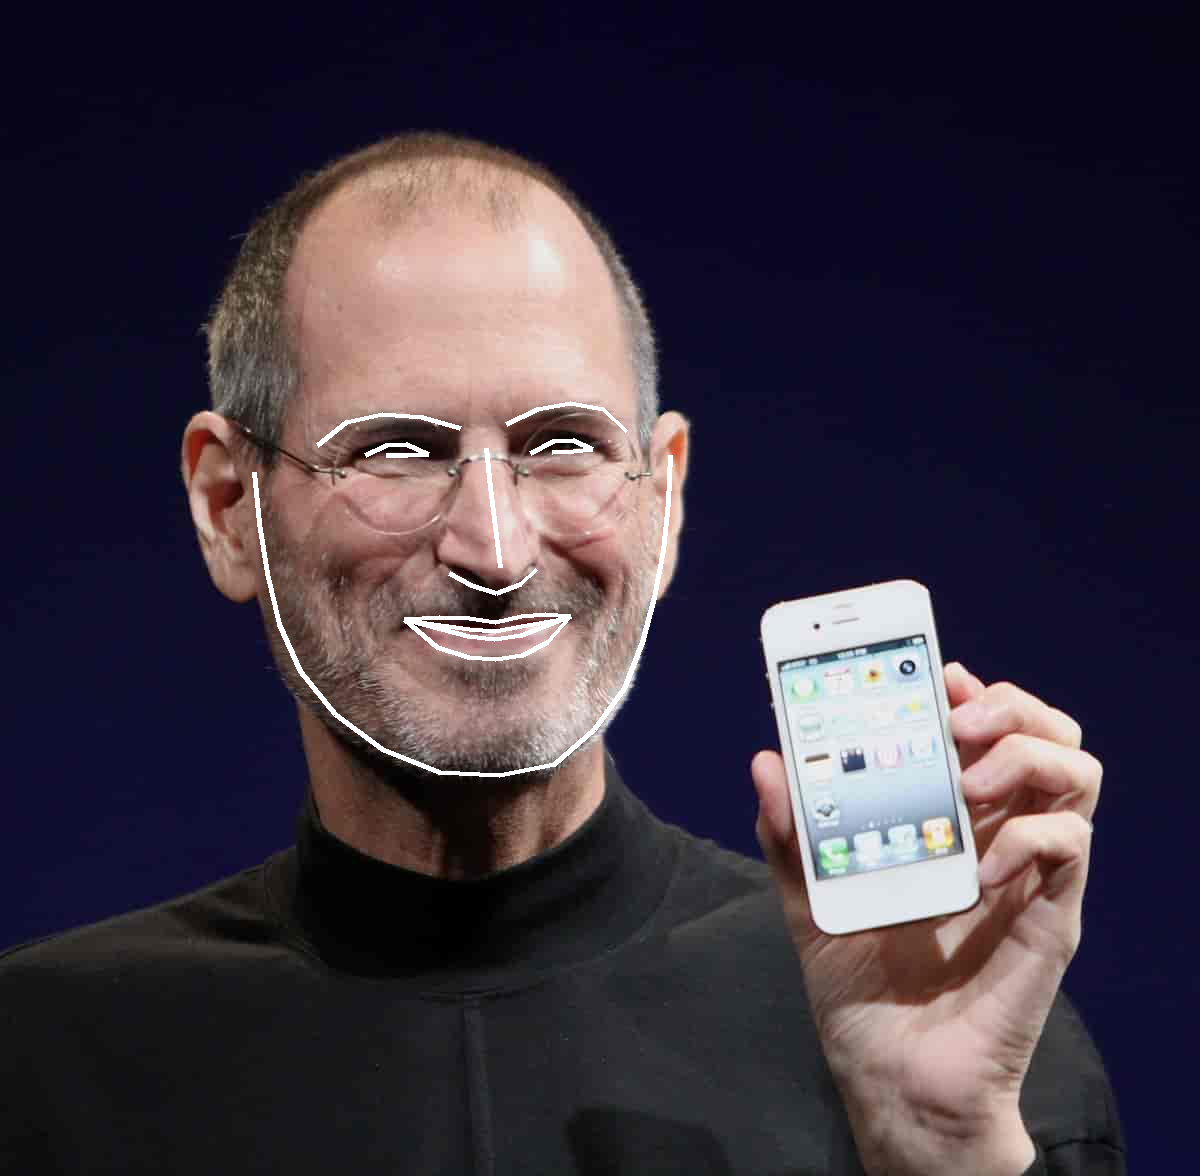

In [12]:
from PIL import Image, ImageDraw
import face_recognition

jobs = face_recognition.load_image_file('jobs.jpg')

# 사진 속에서 모든 facial features를 찾기
face_landmarks_list = face_recognition.face_landmarks(jobs)

print("{} 명의 얼굴을 이 사진에서 찾았습니다.".format(len(face_landmarks_list)))

# PIL 인스턴스를 만듦
# 그 이유는 PIL 인스턴스를 만들어야 사진 안에 무엇인가를 그릴 수 있기 때문이다.
pil_image = Image.fromarray(jobs)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # 모든 facial feature의 위치를 출력한다
    for facial_feature in face_landmarks.keys():
        print("{}는 이 좌표점을 기준으로 형성되어 있습니다: {}".format(facial_feature, face_landmarks[facial_feature]))

    # facial feature에 landmark들을 그린다.
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

display(pil_image)

# 얼굴 부분에 네모칸 그리기

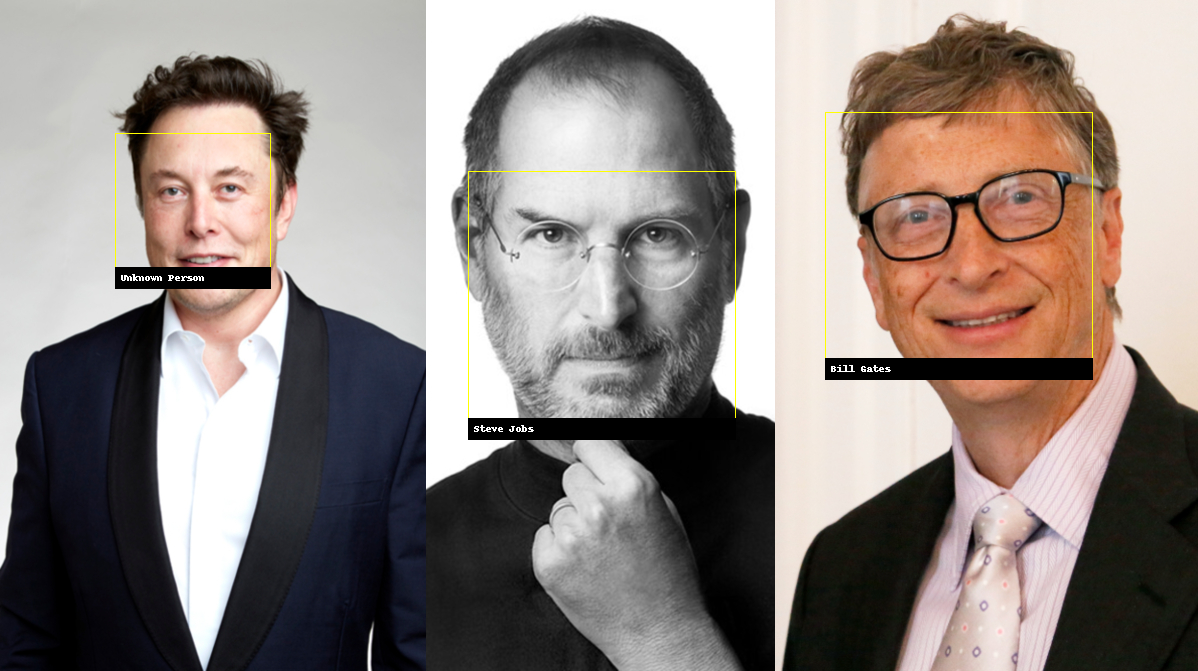

In [8]:
from PIL import Image, ImageDraw

# encoding과 이름들의 array 생성하기
known_face_encoding = [
                       bill_gate_encoding,
                       jobs_encoding  ]
known_face_names = [
                    "Bill Gates",
                    "Steve Jobs"   ]

# 얼굴을 찾기 위한 test image 파일을 로드하기
Musk_jobs_gates = face_recognition.load_image_file('Musk_jobs_gates.jpg')

# test image에서 얼굴 찾기
test_location = face_recognition.face_locations(Musk_jobs_gates)
test_encoding = face_recognition.face_encodings(Musk_jobs_gates, test_location)

# PIL 포멧으로 바꾸기
pil_image2 = Image.fromarray(Musk_jobs_gates)

# ImageDraw 인스턴스 생성
draw = ImageDraw.Draw(pil_image2)

# test image에서 얼굴을 loop문으로 찾는다
for (top, right, bottom, left), test_encoding in zip(test_location, test_encoding):
    matches = face_recognition.compare_faces(known_face_encoding, test_encoding)

    name = "Unknown Person"
    # 만약 사진이 일치한다면
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # 네모를 그린다.
    draw.rectangle(((left, top), (right, bottom)), outline=(255,255,0))

    # 이름을 표시한다.
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0,0,0), outline=(0,0,0))
    draw.text((left +6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

display(pil_image2)